In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.9.0', 'fcn_resnet101', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to /root/.cache/torch/hub/v0.9.0.zip
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

imgnet 통계치를 일치 시켜주어야 한다. 최초에 학습했었던 인코더 백본모델 통계치를 일치시켜주어야 한다.

(normalization 부분)

Dropout : 실행 시킬 때 model.eval() 모드 설정시에는 레이어를 스킵한다.


In [ ]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
from PIL import Image
from torchvision import transforms, datasets
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]) # 전처리 과정

input_tensor = preprocess(input_image) # 통계치 반영
input_batch = input_tensor.unsqueeze(0) # 모델에 탑재하기위한 배치로 만든다.

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

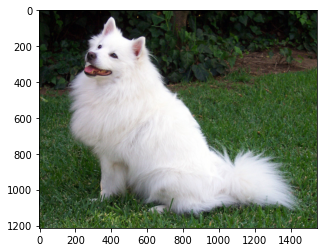

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

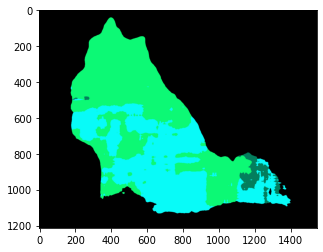

In [ ]:
# 색채설정
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size) # 최종 output값을 넘파이로 반영을하고 사이즈도 리사이즈
r.putpalette(colors)

plt.imshow(r)
# plt.show()

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import glob

workspace_path = '/gdrive/My Drive/Colab Notebooks'  # 실습파일 저장 경로 설정
img_path = os.path.join(workspace_path, 'samples')  # 테스트 샘플이미지 폴더 경로 설정
img_list = glob.glob(os.path.join(img_path, '*.jpg'))  # 샘플이미지 목록 추출

Segmentation:   0%|          | 0/9 [00:00<?, ?it/s]

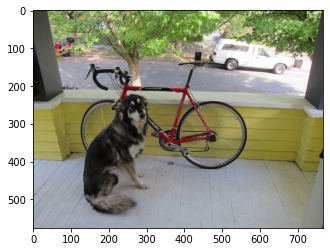

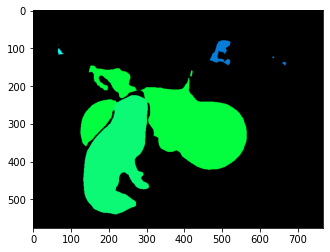

Segmentation:  11%|█         | 1/9 [00:01<00:12,  1.58s/it]

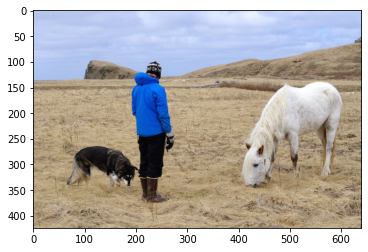

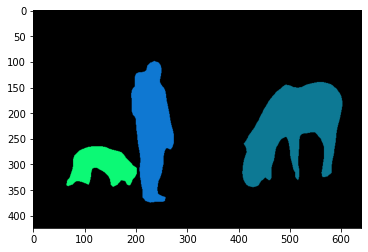

Segmentation:  22%|██▏       | 2/9 [00:02<00:10,  1.45s/it]

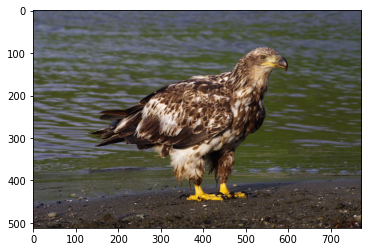

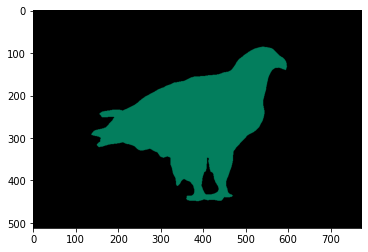

Segmentation:  33%|███▎      | 3/9 [00:04<00:08,  1.40s/it]

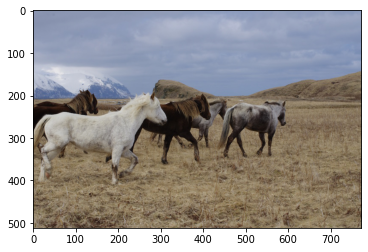

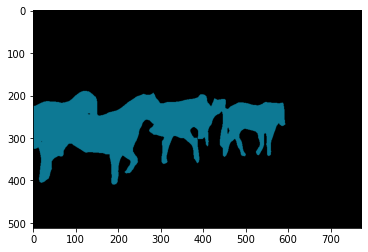

Segmentation:  44%|████▍     | 4/9 [00:05<00:06,  1.38s/it]

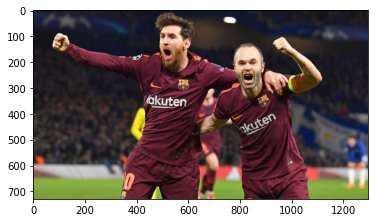

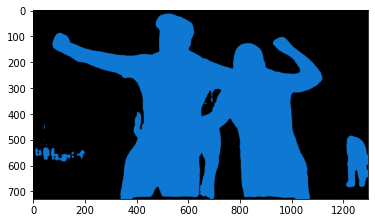

Segmentation:  56%|█████▌    | 5/9 [00:07<00:06,  1.59s/it]

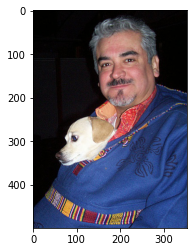

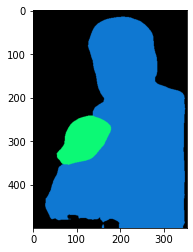

Segmentation:  67%|██████▋   | 6/9 [00:08<00:04,  1.39s/it]

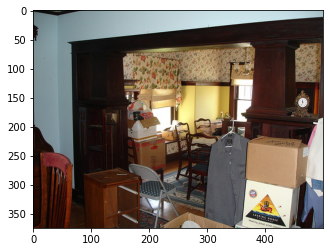

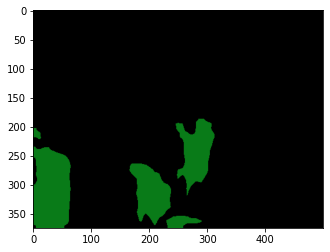

Segmentation:  78%|███████▊  | 7/9 [00:09<00:02,  1.26s/it]

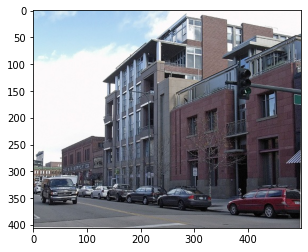

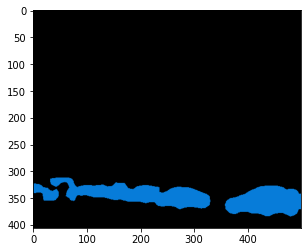

Segmentation:  89%|████████▉ | 8/9 [00:10<00:01,  1.19s/it]

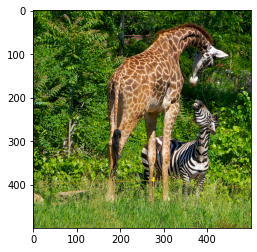

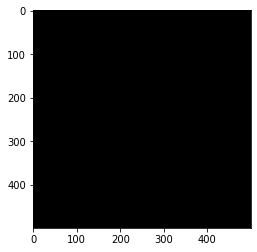

Segmentation: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]


In [ ]:
import tqdm

model.eval()  # Set model to evaluation mode

Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

for img_name in tqdm.tqdm(img_list, desc="Segmentation"): # tqdm : 전체 데이터셋에 대하여 각각 현재의 %를 찍어준다.

    input_image = Image.open(img_name)
    input_tensor = preprocess(input_image) # transform 과정 진행 -> tensor를 만듬
    input_batch = input_tensor.unsqueeze(0) # tensor 정보를 가지고 배치를 만든다.

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')

    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

    plt.imshow(input_image) # 원본이미지 출력
    plt.show()

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)
    plt.show() # prediction된 결과를 출력

객체가 큰 케이스에서는 segmentation이 잘 된다.

기린 : 학습데이터에서 반영하지않아 결과가없음.


### kaggle에서 dataset 다운 후 segmentation 결과 출력

실습 1. segmentation 결과 출력

In [ ]:
import os
import glob

workspace_path = '/gdrive/My Drive/Colab Notebooks/'  # 실습파일 저장 경로 설정
img_path = os.path.join(workspace_path, 'samples2')  # 테스트 샘플이미지 폴더 경로 설정
img_list = glob.glob(os.path.join(img_path, '*.jpg'))  # 샘플이미지 목록 추출

Segmentation:   0%|          | 0/23 [00:00<?, ?it/s]

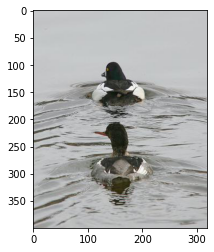

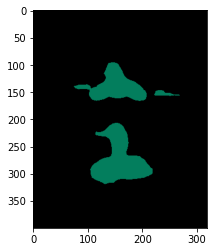

Segmentation:   4%|▍         | 1/23 [00:00<00:19,  1.12it/s]

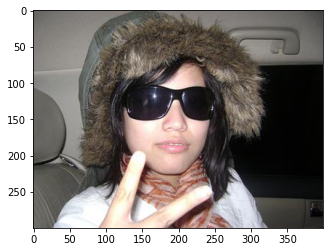

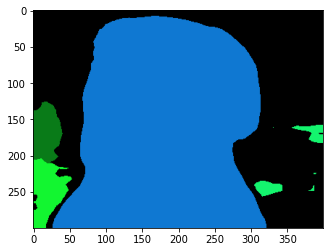

Segmentation:   9%|▊         | 2/23 [00:01<00:19,  1.08it/s]

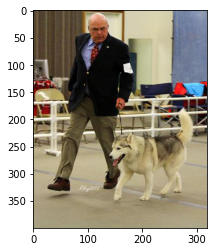

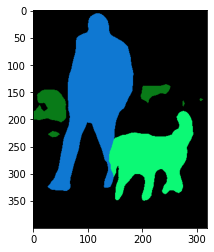

Segmentation:  13%|█▎        | 3/23 [00:02<00:18,  1.06it/s]

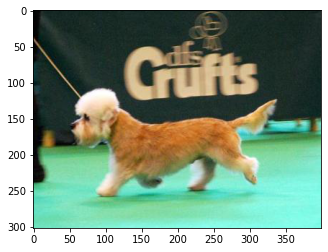

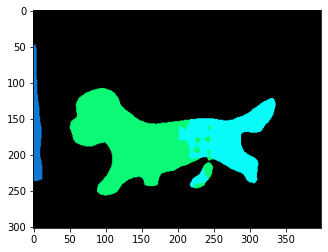

Segmentation:  17%|█▋        | 4/23 [00:03<00:18,  1.05it/s]

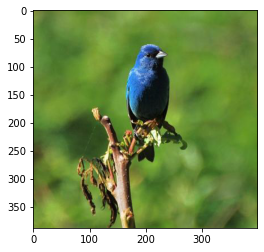

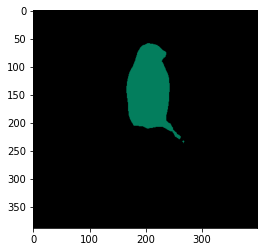

Segmentation:  22%|██▏       | 5/23 [00:04<00:17,  1.03it/s]

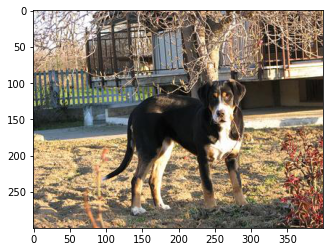

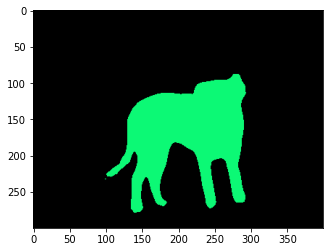

Segmentation:  26%|██▌       | 6/23 [00:05<00:16,  1.01it/s]

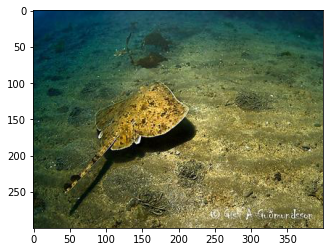

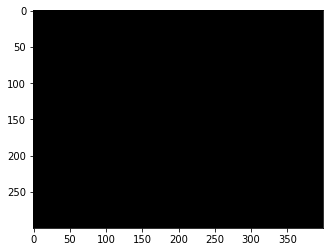

Segmentation:  30%|███       | 7/23 [00:06<00:16,  1.01s/it]

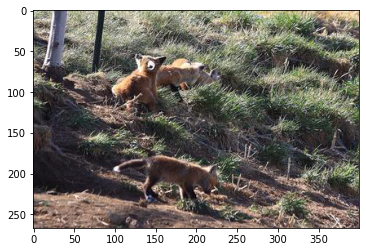

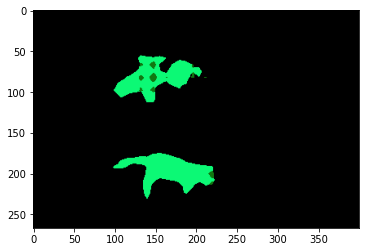

Segmentation:  35%|███▍      | 8/23 [00:08<00:15,  1.03s/it]

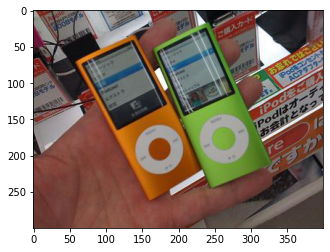

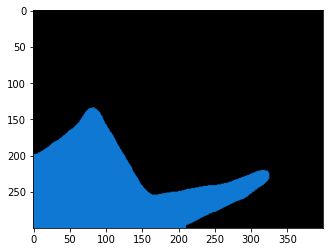

Segmentation:  39%|███▉      | 9/23 [00:09<00:14,  1.03s/it]

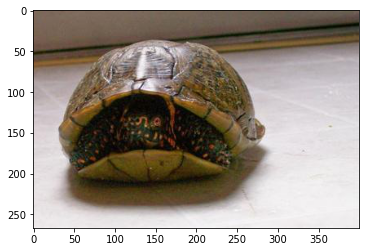

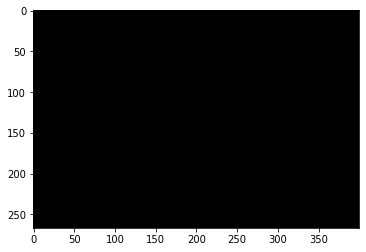

Segmentation:  43%|████▎     | 10/23 [00:10<00:13,  1.02s/it]

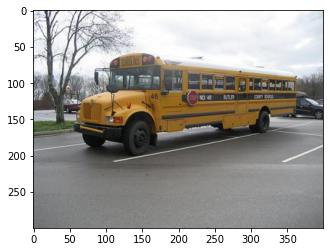

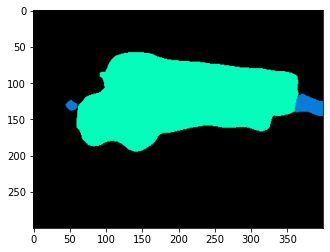

Segmentation:  48%|████▊     | 11/23 [00:11<00:12,  1.01s/it]

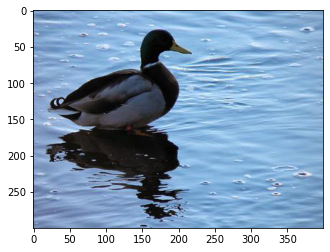

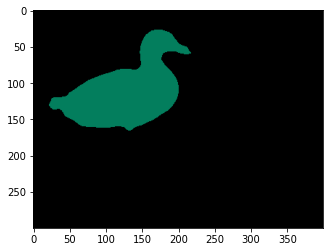

Segmentation:  52%|█████▏    | 12/23 [00:12<00:11,  1.07s/it]

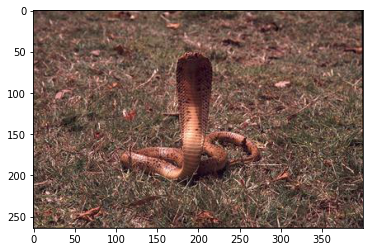

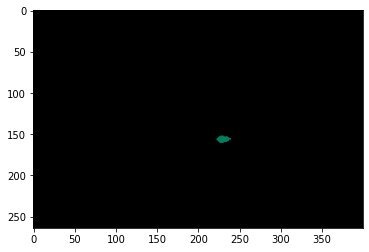

Segmentation:  57%|█████▋    | 13/23 [00:13<00:10,  1.05s/it]

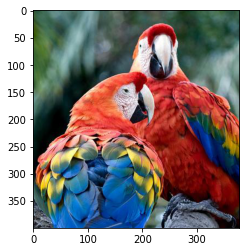

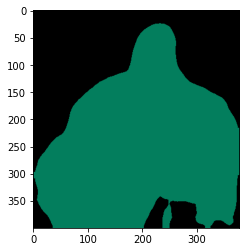

Segmentation:  61%|██████    | 14/23 [00:14<00:09,  1.05s/it]

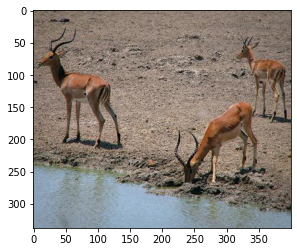

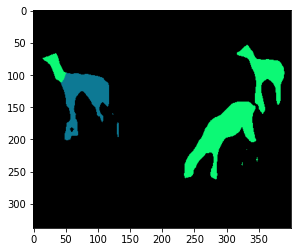

Segmentation:  65%|██████▌   | 15/23 [00:15<00:08,  1.05s/it]

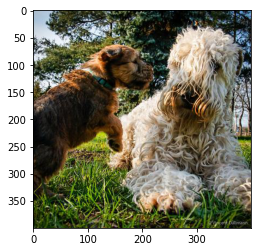

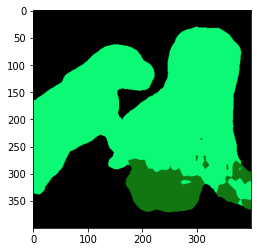

Segmentation:  70%|██████▉   | 16/23 [00:16<00:08,  1.18s/it]

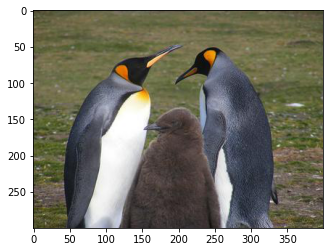

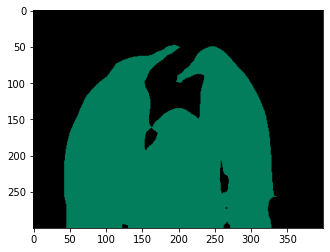

Segmentation:  74%|███████▍  | 17/23 [00:17<00:06,  1.14s/it]

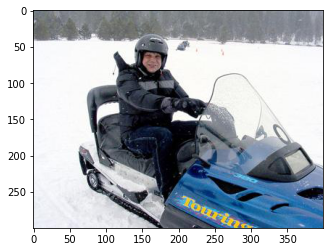

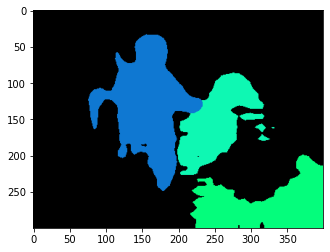

Segmentation:  78%|███████▊  | 18/23 [00:18<00:05,  1.09s/it]

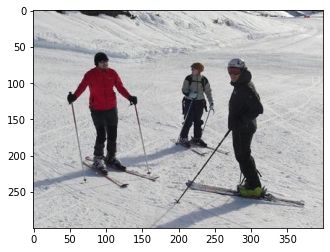

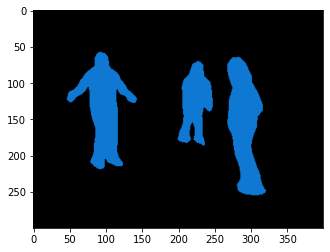

Segmentation:  83%|████████▎ | 19/23 [00:19<00:04,  1.07s/it]

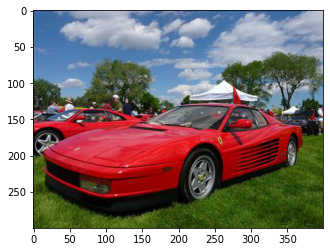

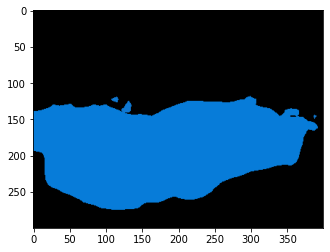

Segmentation:  87%|████████▋ | 20/23 [00:20<00:03,  1.06s/it]

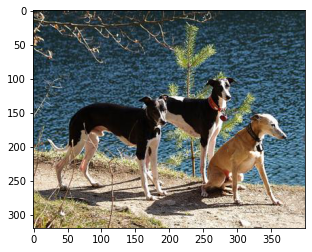

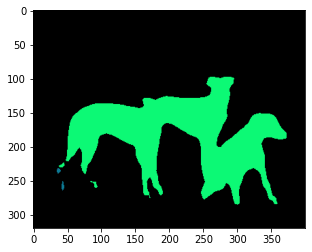

Segmentation:  91%|█████████▏| 21/23 [00:21<00:02,  1.06s/it]

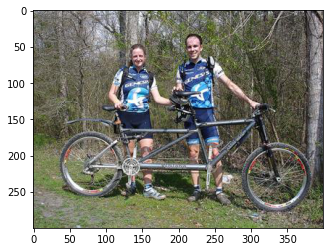

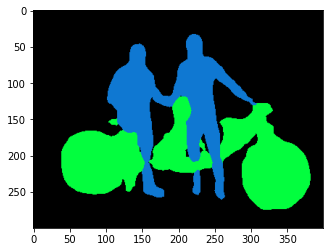

Segmentation:  96%|█████████▌| 22/23 [00:23<00:01,  1.07s/it]

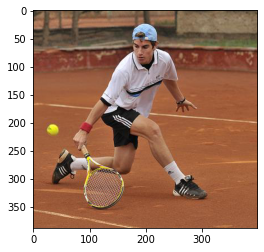

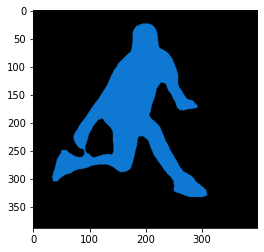

Segmentation: 100%|██████████| 23/23 [00:24<00:00,  1.05s/it]


In [ ]:
import tqdm

model.eval()  # Set model to evaluation mode

Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

for img_name in tqdm.tqdm(img_list, desc="Segmentation"): # tqdm : 전체 데이터셋에 대하여 각각 현재의 %를 찍어준다.

    input_image = Image.open(img_name)
    input_tensor = preprocess(input_image) # transform 과정 진행 -> tensor를 만듬
    input_batch = input_tensor.unsqueeze(0) # tensor 정보를 가지고 배치를 만든다.

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')

    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

    plt.imshow(input_image) # 원본이미지 출력
    plt.show()

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)
    plt.show() # prediction된 결과를 출력

실습 2. 데이터셋 정보(DUTS Salient Object Detection Dataset, https://www.kaggle.com/balraj98/duts-saliency-detection-dataset)

**실습 3. Segmentation 결과 분석**

배경과 물체의 색이나 구분이 명확할때 segmentation 결과가 우수 하였으며,

배경색이 그대로 나오는 반투명 혹은 투명한 물체를 통한 사진은 투명한 부분기준으로 분리가 되어 다른 물체로 인식을 하는것 같고, 어떠한 물체에 가려져있다면 기존의 사진을 제대로 segmentation 하지 못하였습니다.

학습이 되지 않은 모델 같은 경우 인식이 안됩니다.